In [1]:
from pathlib import Path

import networkx as nx
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Medium Articles Dataset

We provide a dataset of medium articles which have to be tagged to corresponding topics (software-development, artificial intellignece, Ui/UX). Along with articles we have subscriptions lists. The articles may be related by common subscription lists. The goal is to exploit this naturally occuring network structure for classifying articles to topics. Hence, it is a 3-way node classification task

In [3]:
final_data = pd.read_csv("full_data_without_labels.csv")
final_data

,article,title,subtitle,author,date,list
0,https://medium.com/@maniakacademy/code-demo-sh...,Code/Demo Share: Palo Alto Firewall Network In...,IP is broken as a unit of Control! IDENTITY as...,Sebastian Maniak,2022-08-17,https://medium.com/@zemmali1990/list/aws-49f68...
1,https://medium.com/towards-artificial-intellig...,Clustering using Social Graph Network,A Social Graph Network can be formed when ther...,Naveed Ahmed Janvekar,2022-01-29,https://medium.com/@TomaszCieplak/list/graph-d...
2,https://medium.com/@sarafparam/transformers-fo...,Transformers for Time-Series,Forecasting still remains to be dominated by S...,Param Saraf,2020-10-20,https://medium.com/@sergiobonato/list/time-ser...
3,https://medium.com/towards-data-science/review...,Reviewing A/B Testing Course by Google on Udacity,Read to find out how A/B tests are performed a...,Suyash Maheshwari,2020-05-10,https://medium.com/@online.rajib/list/ml-c2cac...
4,https://medium.com/towards-data-science/a-comp...,A Comprehensive Hands-on Guide to Transfer Lea...,Deep Learning on Steroids with the Power of Kn...,Dipanjan (DJ) Sarkar,2018-11-14,https://medium.com/@farhanhanavi07/list/deep-l...
...,...,...,...,...,...,...
27713,https://medium.com/cometheartbeat/deep-learnin...,Deep Learning Techniques you Should Know in 2022,"Over the years, Deep Learning has really taken...",Nisha Arya Ahmed,2022-04-21,https://medium.com/@vigguvenki/list/deep-learn...
27714,https://medium.com/towardsdev/intro-to-object-...,Intro to Object-Oriented Programming For Data ...,Implement a simple Linear Regression with OOP ...,Bex T.,2021-04-12,https://medium.com/@or.matalon2/list/oop-4aad5...
27715,https://medium.com/towards-data-science/learn-...,Learn Enough Docker to be Useful,Part 1: The Conceptual Landscape — Containers ...,Jeff Hale,2019-01-09,https://medium.com/@vaibhavb2473/list/machine-...
27716,https://medium.com/berndruecker/moving-from-em...,Moving from embedded to remote workflow engines,"For a long time, we have advocated for an arch...",Bernd Rücker,2022-02-08,https://medium.com/@giamma80/list/java-3c31810...


In [4]:
train = pd.read_csv("kaggle_train.csv")
train

,index,article,title,subtitle,author,date,list,labels
0,4293,https://medium.com/towards-data-science/the-jo...,"The Joy of A/B Testing, Part II: Advanced Topics","Cookies and privacy, interleaving experiments,...",Samuel Flender,2022-08-13,https://medium.com/@tomwillard/list/data-scien...,artificial-intelligence
1,9375,https://medium.com/@daratanxe/text-analysis-of...,Text Analysis of The Good Place,Exploring NBC’s The Good Place with Text Analy...,Dara Tan,2020-10-19,https://medium.com/@gurumurthi/list/nlp-b43703...,software-development
2,8518,https://medium.com/@steelkiwi/how-to-build-an-...,How to Build an Educational Platform for Kids ...,— Originally published on Steelkiwi Have you e...,SteelKiwi Inc.,2022-07-01,https://medium.com/@kanivel/list/app-developme...,software-development
3,7515,https://medium.com/towards-data-science/spearm...,Spearman coefficient: Tool for a generalized c...,Linear relationships are not all a correlation...,Tirthajyoti Sarkar,2021-11-01,https://medium.com/@jstart.james/list/signal-p...,artificial-intelligence
4,2718,https://medium.com/lyft-engineering/a-review-o...,A Review of Multi-Armed Bandits Applications a...,"By Sara Smoot, Alex Contryman and Yanqiao Wang...",Yanqiao Wang,2023-01-23,https://medium.com/@kishorkukreja/list/causali...,artificial-intelligence
...,...,...,...,...,...,...,...,...
26327,21575,https://medium.com/towards-artificial-intellig...,A Unique Way Of Visualising Confusion Matrix —...,Go Sankey for Less Confusion! — A confusion ma...,Hrishikesh Pate,2022-07-08,https://medium.com/@ashwin_patil/list/data-vis...,artificial-intelligence
26328,5390,https://medium.com/towards-data-science/constr...,Construct the Matrix interaction network based...,"Combine web scraping, OCR, and entity recognit...",Tomaz Bratanic,2021-12-16,https://medium.com/@farhanhanavi07/list/graph-...,artificial-intelligence
26329,860,https://medium.com/towards-data-science/real-t...,Real-time anomaly detection with Apache Kafka ...,Learn how to make predictions over streaming d...,Rodrigo Arenas,2021-06-18,https://medium.com/@aesmin/list/data-stack-and...,artificial-intelligence
26330,15795,https://medium.com/@stermi/damn-vulnerable-def...,Damn Vulnerable DeFi Challenge #5 Solution — T...,Damn Vulnerable DeFi is the war game created b...,StErMi,2022-04-18,https://medium.com/@tracrium/list/web3-blockch...,software-development


In [5]:
test = pd.read_csv("kaggle_test.csv")
test

,index,article,title,subtitle,author,date,list
0,14793,https://medium.com/dev-genius/ensemble-models-...,Modelling the Growth and Mortality of Broiler ...,Using Ensemble Models in R — In this post I wi...,Dr. Marc Jacobs,2021-11-12,https://medium.com/@dale.adkins/list/r-tips-tr...
1,21462,https://medium.com/@savasy-22028/prompting-in-...,Prompting in NLP: Prompt-based zero-shot learning,Prompt-based learning is getting a new paradig...,Savas Yıldırım,2022-03-24,https://medium.com/@Digeratus/list/deeplearnin...
2,10133,https://medium.com/datadriveninvestor/portfoli...,Portfolio Optimization with Python: using SciP...,Introduction Modern Portfolio Theory (MPT) is ...,Ebrahim Pichka,2023-01-18,https://medium.com/@vigguvenki/list/technical-...
3,16050,https://medium.com/towards-data-science/a-swif...,A Swift Introduction To Flux For Julia (With C...,Building your first gradient model in Julia wi...,Emmett Boudreau,2020-02-25,https://medium.com/@joexgibbs/list/julia-888c9...
4,3609,https://medium.com/towards-data-science/metric...,Metric Design for Data Scientists and Business...,What’s the hardest part of metric design? — In...,Cassie Kozyrkov,2022-10-23,https://medium.com/@vaibhavb2473/list/stats-an...
...,...,...,...,...,...,...,...
1381,4413,https://medium.com/@tsuyoshiushio/writing-a-fu...,Writing a function with Action in PowerShell,I wanted to write a function that has an actio...,Tsuyoshi Ushi,2022-10-03,https://medium.com/@matteomentella/list/engine...
1382,17710,https://medium.com/ambassador-api-gateway/the-...,SRE vs Platform Engineering,"DevOps, GitOps, and the Rise of Cloud-Native E...",Ambassador Labs,2021-02-08,https://medium.com/@pgrove/list/platform-eng-b...
1383,27586,https://medium.com/towards-data-science/primer...,Primer on Cleaning Text Data,Cleaning text is an important part of NLP pre-...,Seungjun (Josh) Kim,2022-09-02,https://medium.com/@leiding_10397/list/ml-b33b...
1384,501,https://medium.com/towards-data-science/log-no...,Log-normal Distribution - A simple explanation,"How to calculate μ & σ, the mode, mean, median...",Maja Pavlovic,2022-02-16,https://medium.com/@vaibhavb2473/list/stats-an...


In [ ]:
# train["labels"].value_counts()

In [ ]:
# test["labels"].value_counts()

In [ ]:
# train.subtitle

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

"""
Generate encoding for labels using label encoder
"""
multilabel_binarizer = LabelEncoder()
multilabel_binarizer.fit(train["labels"])

Y = multilabel_binarizer.transform(train["labels"])
texts = [x[0] + " " + x[1] for x in zip(train.title, train.subtitle)]

In [16]:
from gensim.models import Word2Vec

"""Train word2vec model on title + subtitles to establish a baseline 
without network structure
"""
all_texts = [x[0] + " " + x[1] for x in zip(final_data.title, final_data.subtitle)]

word2vec_model = Word2Vec([text.split(" ") for text in all_texts], vector_size=128, window=7, epochs=40, sg=1,
                          workers=4, min_count=1)

In [17]:
from sklearn.svm import SVC

embeddings = []
"""Infer word2vec embeddings for article titles and subtitles using trained word2vec model
"""
for text in texts:
    embeddings.append(np.mean([word2vec_model.wv[word] if word in word2vec_model.wv else np.zeros(128) for word in text.split(" ")], axis=0))
print(np.vstack(embeddings).shape)
X_word2vec = np.vstack(embeddings)

(26332, 128)


In [18]:
"""Train a SVM classifier on generated article embeddings
"""
svc = SVC()
svc.fit(X_word2vec, Y)

SVC()

In [19]:
test_embeddings = []
test_texts = [x[0] + " " + x[1] for x in zip(test.title, test.subtitle)]
"""Compute embeddings for test samples
"""
for text in test_texts:
    test_embeddings.append(np.mean([word2vec_model.wv[word] if word in word2vec_model.wv else np.zeros(128) for word in text.split(" ")], axis=0))
print(np.vstack(test_embeddings).shape)
X_word2vec_test = np.vstack(test_embeddings)

(1386, 128)


In [14]:
# """Generate predictions using the SVM classifier for test articles
# """
# predictions = svc.predict(X_word2vec_test)

In [ ]:
# """Encode predictions
#     """
# Y_test = multilabel_binarizer.transform(test["labels"])
# 
# Y_test

In [ ]:
# from sklearn import metrics
# 
# """Compute Macro f1"""
# print(metrics.f1_score(Y_test, predictions, average="macro"))

In [ ]:
# print(metrics.classification_report(Y_test, predictions))

# Pipeline Overview

Our goal is to construct a graph from  given data by connecting nodes that atleast share one common subscription list.

This step is followed by a random walk to construct node embeddings.

Then the node embeddings are employed for the task of topic classification.

 ![image.png](image.png)
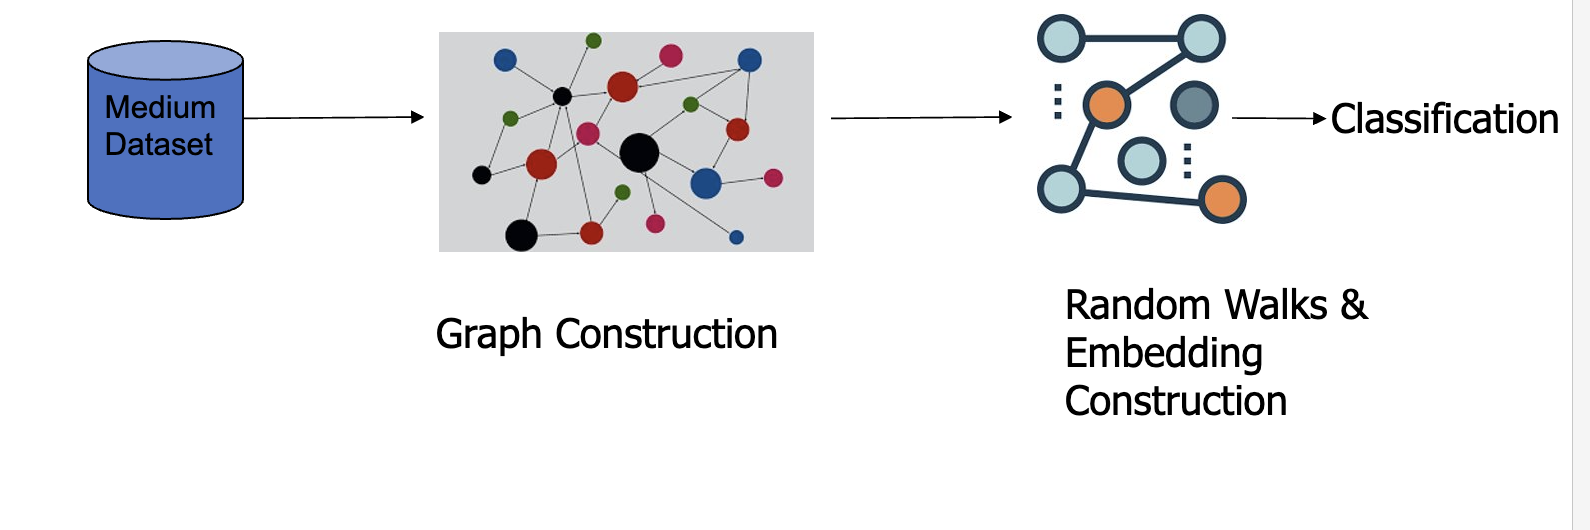

# Form graph

Our goal is to construct a graph from  given data by connecting nodes that at least share one common subscription list. The networkx part has already been written for you. 

Your task here is to write the module to construct the edges and find isolated nodes and also analyze the resulting graph by reporting number of edges, number of nodes, number of isolated nodes. 



In [20]:
from typing import List, Dict
from tqdm import tqdm
import pandas as pd

def get_edges(data: pd.DataFrame, nodes) -> List:
    """ Given the dataframe with articles and lists return the set of edges
        Args:
        data (pd.DataFrame): The medium dataset
        nodes: dict (nodeid: article title)
    Returns:
            edges (List[tuple]): List of edges"""
    edges = []
    ## START
    
    # bucket with the list's url as key and articles that are contained by this list as values 
    url_buckets = {}

    for i, row in data.iterrows():
        # the list field can be of the form 'url1; url2; url3; ..'
        for url in row["list"].split("; "):
            if url not in url_buckets.keys():
                url_buckets[url] = []
            url_buckets[url].append(i)
 
    # for each bucket create edges between the articles
    # duplicate edges will be ignored when creating the graph
    for key in url_buckets.keys():
        bucket = url_buckets[key]
        for i in range(len(bucket)):
            for j in range(i+1, len(bucket)):
                if bucket[i] != bucket[j]:
                    edges.append((bucket[i], bucket[j]))
    print(f'{len(edges)} edges (incl. duplicates)')
    ## END
    return edges

In [21]:
def get_nodes(data: pd.DataFrame) -> Dict:
    """ Given the dataframe with articles and lists return the set of nodes
        Args:
        data (pd.DataFrame): The medium dataset
    Returns:
        nodes: dict (nodeid: article title)"""
    nodes = {}
    for index, row in data.iterrows():
        if index not in nodes:
            nodes[index] = row["title"]
    print(f'{len(nodes)} nodes')
    return nodes

In [22]:
import networkx as nx

def form_graph(data: pd.DataFrame) -> nx.Graph:
    """Forms graph from medium article dataset.

    Args:
        data (pd.DataFrame): The medium dataset

    Returns:
        G (nx.Graph): The graph.

       """
    texts = [x[0] + " " + x[1] for x in zip(data.title, data.subtitle)]
    nodes = get_nodes(data)
    edges = get_edges(data, nodes)
    graph = nx.Graph()
    graph.add_nodes_from(list(nodes.keys()))
    graph.add_edges_from(edges)
    return graph

In [23]:
graph = form_graph(final_data)
print(graph)

27718 nodes
2257190 edges (incl. duplicates)
Graph with 27718 nodes and 2014162 edges


# Node2Vec

Here the task is to perform random walks on the graph formed in the previous step and compute embeddings for the nodes using the random walk results.

You can use gensim to compute embeddings, however for random walks you are expected to implement without relying on networkx. Your weblab assignment would aid you in the same. For gensim you are expected to use Word2Vec. However, you  can explore on best ways to configure the hyperparams for your word2vec instance for better downstream classification task.

In [24]:
# Find isolated nodes with no neighbors before random walks
### START
isolated = []

for node in graph.nodes:
    if graph.degree(node) == 0:
        isolated.append(node)
        
print(f'The graph contains {len(isolated)} isolated nodes')        

### END

The graph contains 347 isolated nodes


In [25]:
def random_walks(graph: nx.Graph, num_walks: int, walk_length: int, isolated:List) -> List:
    """Perform random walks on an unweighted graph.

    Args:
        graph (nx.Graph): The graph.
        num_walks (int): The number of random walks for each node.
        walk_length (int): The number of nodes in a random walk.

    Returns:
        np.ndarray: The random walks, shape (n_nodes * num_walks, walk_length)
    """
    ### START ANSWER
    result = []

    for node in tqdm(graph.nodes):
        # ignore isolated nodes as their walk length cannot be larger than 1
        if node in isolated:
            continue
            
        for walk_count in range(num_walks):
            walk = []
            for pos in range(walk_length):
                # use strings to decrease the runtime of word2vec
                walk.append(str(node))
                node = np.random.choice(list(graph.neighbors(node)))
            result.append(walk)
    
    ### END ANSWER
    # return a list instead of a numpy array (since it doesn't work with word2vec)
    return result

In [26]:
# runs in < 2 min
walks = random_walks(graph, 8, 15, isolated)

100%|██████████| 27718/27718 [01:24<00:00, 328.13it/s]


In [27]:
print(f'Generated {len(walks)} random walks')

Generated 218968 random walks


In [28]:
from gensim.models import Word2Vec


def fit_node2vec(walks: np.ndarray, vector_size: int, window: int, epochs: int) -> Word2Vec:
    """Train a Node2Vec model on random walks. Uses the GenSim Word2Vec implementation.

    Args:
        walks (np.ndarray): The random walks.
        vector_size (int): Node representation size.
        window (int): Window width.
        epochs (int): Number of epochs.

    Returns:
        Word2Vec: The trained model.
    """
    ### START
    # sg=1 using Skip-gram
    # workers=4 for making the training faster
    # TODO DO WE NEED IT? min_count=1 ignores all words that appear less than 1 times
    model = Word2Vec(walks, vector_size=vector_size, window=window, epochs=epochs, sg=1, workers=4, min_count=1)
    return model
    
    ### END

In [29]:
# runs in < 1 min
model = fit_node2vec(walks, 128, 5, 10)

In [30]:
def get_nodeids(data: pd.DataFrame):
    """Get nodeids from graph

    Args:
        data (pd.DataFrame): medium articles dataset

    Returns:
        nodes (dict): nodeids with mapped article titles
    """
    nodes = {}
    for index, row in data.iterrows():
        if row["index"] not in nodes:
            nodes[row["index"]] = row["title"]
    return nodes

In [31]:
"""Get train and test nodes from the graph
    """
train_nodes = get_nodeids(train)
test_nodes = get_nodeids(test)
train_nodes = list(train_nodes.keys())
test_nodes = list(test_nodes.keys())

In [32]:
print(f'We have {len(test_nodes)} nodes in the test set')

We have 1386 nodes in the test set


In [33]:
"""Get node2vec embeddings (nodeid to embeddings mapping)
    """
embeddings = {word: model.wv[word] for word in model.wv.index_to_key}

# Word2vec + Node2vec

In [34]:
"""Compute train and test embeddings.
Concatenate the word2vec embeddings of article titles
with the node2vec embeddings suing dictionary from previous step.
Dimension 1 of your embeddings should be 256.
 Consider isolated nodes and handle them when computing embeddings"""
### START 
print('Train set:')

# compute node2vec embeddings from train set
X_train_n2v = np.array(
    [embeddings[str(x)] if x not in isolated else np.zeros((128)) for idx, x in enumerate(train_nodes)],
    dtype=np.float32)
print(f'Node2Vec embeddings: {X_train_n2v.shape}')
print(f'Word2Vec embeddings: {X_word2vec.shape}')

# concatenate the word2vec embeddings with the node2vec embeddings
X_train_n2v = np.concatenate((X_word2vec, X_train_n2v), axis=1)
print(f'Node2Vec + Word2Vec embeddings: {X_train_n2v.shape}')
### END

### START 
print('\nTest set:')

# compute node2vec embeddings from test set
X_test_n2v = np.array(
    [embeddings[str(x)] if x not in isolated else np.zeros((128)) for idx, x in enumerate(test_nodes)],
    dtype=np.float32)
print(f'Node2Vec embeddings: {X_test_n2v.shape}')
print(f'Word2Vec embeddings: {X_word2vec_test.shape}')

# concatenate the word2vec embeddings with the node2vec embeddings
X_test_n2v = np.concatenate((X_word2vec_test, X_test_n2v), axis=1)

print(f'Node2Vec + Word2Vec embeddings: {X_test_n2v.shape}')
### END

Train set:
Node2Vec embeddings: (26332, 128)
Word2Vec embeddings: (26332, 128)
Node2Vec + Word2Vec embeddings: (26332, 256)

Test set:
Node2Vec embeddings: (1386, 128)
Word2Vec embeddings: (1386, 128)
Node2Vec + Word2Vec embeddings: (1386, 256)


In [35]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC, SVC

svc = SVC()
svc.fit(X_train_n2v, Y)

SVC()

In [36]:
predictions = svc.predict(X_test_n2v)
predictions

array([0, 0, 0, ..., 0, 0, 1])

In [37]:
# TODO DELETE for kaggle 
submission = pd.read_csv("sample_submission.csv")
labels = multilabel_binarizer.inverse_transform(predictions)

for i, row in submission.iterrows():
    submission.loc[i, 'Label'] = labels[i]

submission.to_csv('solution.csv', index=False)
submission

,Index,Label
0,0,artificial-intelligence
1,1,artificial-intelligence
2,2,artificial-intelligence
3,3,artificial-intelligence
4,4,artificial-intelligence
...,...,...
1381,1381,software-development
1382,1382,software-development
1383,1383,artificial-intelligence
1384,1384,artificial-intelligence


In [ ]:
# from sklearn import metrics
# 
# print(metrics.f1_score(Y_test, predictions, average="macro"))

In [ ]:
# print(metrics.classification_report(Y_test, predictions))

# Only node2vec features

In [37]:
X_train_n2v = np.array(
    [embeddings[str(x)] if x not in isolated else np.zeros((128)) for idx, x in enumerate(train_nodes)],
    dtype=np.float32)

X_test_n2v = np.array(
    [embeddings[str(x)] if x not in isolated else np.zeros((128)) for idx, x in enumerate(test_nodes)],
    dtype=np.float32)

In [38]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC, SVC

svc = SVC()
svc.fit(X_train_n2v, Y)

SVC()

In [39]:
predictions = svc.predict(X_test_n2v)

In [40]:
from sklearn import metrics

print(metrics.f1_score(Y_test, predictions, average="macro"))

0.7190045160622764


In [41]:
print(metrics.classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80      1899
           1       0.84      0.76      0.79      2022
           2       0.86      0.41      0.56        29

    accuracy                           0.80      3950
   macro avg       0.82      0.67      0.72      3950
weighted avg       0.80      0.80      0.80      3950


 Compare performance of word2vec only, node2vec embeddings only (above) and word2vec+node2vec settings.
  Report your intuition below in text as to why one works better than other and to what extent network structure helps compare dto only using word2vec embeddings of titles and subtitles (first result).

 You can also plot the tsne plot of embeddings to gain more intuition

## Approach 1: Word2Vec only

|---|---|
| **F1 score** | **0.53** |
| Label 0 | Higher precision than recall |
| Label 1 | Higher recall than precision |
| Label 2 | No predictions for UX label |

## Approach 2: Word2Vec + Node2Vec

|---|---|
| **F1 score** | **0.73** |
| Label 0 | Higher recall than precision |
| Label 1 | Higher precision than recall |
| Label 2 | Higher precision than recall |

## Approach 3: Node2Vec only

|---|---|
| **F1 score** | **0.72** |
| Label 0 | Higher recall than precision |
| Label 1 | Higher precision than recall |
| Label 2 | Higher precision than recall |

Firstly, we can observe that for Approach 1 there are no predictions made for the UX label. This might be caused by the distribution of labels in the train set. The UX label only has 150 training samples, while the other 2 have over 10.000 samples. This might cause the SVM classifier to ignore these few samples and focus on fitting the other 20.000 samples better.

... More ideas? :)  (word embeddings vs network embeddings, words that overlap among all labels, so it's hard to link them to one specific label)

# TODO Plot TSNE of embeddings

Compare the performance between node2vec based classification which only relies on
network structure and the performance of word2vec+nodevec which considers the
semantic features from article titles and network structure. You could plot the
embeddings to get an idea of intuition as to why one method works better than other.
